In [20]:
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
# list for column headers
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=names)

* explore the dataset
    - head
    - shape

In [5]:
df.shape
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* create X and y (the goal is to predict column **class** based on other variables)

In [6]:
X=df.drop(columns='class')
y=df['class']

In [14]:
set(y)

{0, 1}

* split data set to train set and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

* import RandomForestClassifier from sklearn

* create model

In [51]:
clf= RandomForestClassifier(random_state= 25)

* fit training set with default parameters

In [52]:
clf = clf.fit(X_train,y_train)

* predict X_test

In [53]:
y_pred = clf.predict(X_test)

* import roc_auc_score and confusion_matrix from sklearn

* print confusion matrix

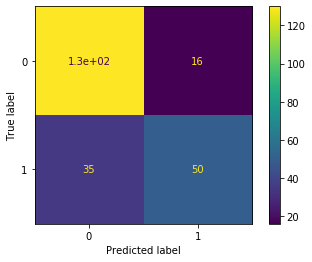

In [18]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [17]:
metrics.confusion_matrix(y_test,y_pred)

array([[130,  16],
       [ 35,  50]], dtype=int64)

* print AUC

In [54]:
metrics.roc_auc_score(y_test,y_pred)

0.7393231265108784

In [ ]:
print(metrics.classification_report(y_test, y_pred))

* import GridSearchCV from sklearn

In [26]:
from sklearn.model_selection import GridSearchCV

In [69]:
gridclf= RandomForestClassifier(random_state=25)

* create grid (optimize for number of trees and max depth in one tree)

In [22]:
np.arange(10,200,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])

In [70]:
np.random.seed(10)
parameter_candidates = [
  {'n_estimators':np.random.randint(100,1000,10), 'max_depth': np.random.randint(2,15,10)}]

* fit training data with grid search

In [71]:
gridd = GridSearchCV(gridclf, param_grid=parameter_candidates)
gridd.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=25,
                               

In [45]:
gridd.best_params_

{'max_depth': 11, 'n_estimators': 223}

* print confusion matrix with the best model

In [64]:
newclf=RandomForestClassifier(max_depth= 11, n_estimators= 833,random_state=25)
newclf = newclf.fit(X_train,y_train)
y_pred2 = newclf.predict(X_test)

In [68]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.79      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



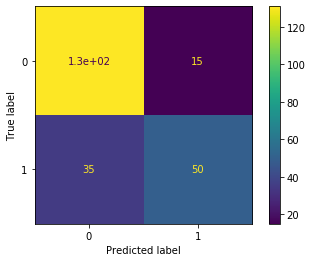

In [60]:
metrics.plot_confusion_matrix(newclf,X_test,y_test)

* print AUC with the best model

In [65]:
metrics.roc_auc_score(y_test,y_pred2)

0.7579371474617245

In [66]:
metrics.roc_auc_score??

- is the model better than default?

In [41]:
the model with the grid search is better

array([688, 739, 707, 820, 842, 474, 461, 843, 567, 964])

In [42]:
np.random.randint(2,15,10)

array([ 9,  8, 14,  3, 14,  8, 12,  3,  4,  5])